# Exploratory data analysis

In [4]:
# Setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
parent_abs = os.path.abspath(os.path.join(os.getcwd(),os.pardir))

In [75]:
df = pd.read_csv(os.path.join(parent_abs,'data\\cleaned.csv'),index_col=0)
df.head()

y = df.iloc[:,-1]
X = df.iloc[:,:-1]

0      100
1       75
2       95
3      115
4      105
      ... 
308    115
309    105
310    115
311    115
312    105
Name: bayley_3_t1, Length: 313, dtype: int64

In [33]:
# Check correlation

correlations = []

for column in X.columns:
    corr = float(X[column].corr(y))
    correlations.append([column,corr])

In [50]:
# Adjusted limiar for only 6 features

limiar = 0.11

most_correlated = []

for category in correlations:
    if category[1] > limiar or category[1] < -limiar:
        most_correlated.append(category[0])
        print(category)

['DENITRIFICATION-PWY', -0.18500324481690258]
['PWY-6471', -0.11064736220389981]
['PWY-7198', -0.13570741002303915]
['PWY0-1533', -0.13132796311010617]
['LowAlpha_t1', -0.11406529597808118]
['RH_temporal_theta_t1', 0.1233485301861543]


In [51]:
df_correlations = pd.concat([y, df[most_correlated]],axis=1)

df_correlations.head()

,bayley_3_t1,DENITRIFICATION-PWY,PWY-6471,PWY-7198,PWY0-1533,LowAlpha_t1,RH_temporal_theta_t1
0,100,0.000000,0.0,278.736048,0.0,0.000128,11.066145
1,75,320.494755,0.0,1937.025673,0.0,0.005333,7.316511
2,95,0.000000,0.0,1506.537830,0.0,0.000177,10.349887
3,115,26.374059,0.0,0.000000,0.0,0.003928,11.525351
4,105,0.000000,0.0,123.003244,0.0,-0.000496,10.511222


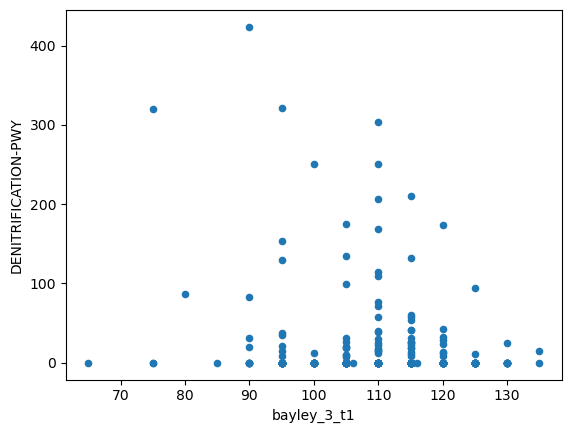

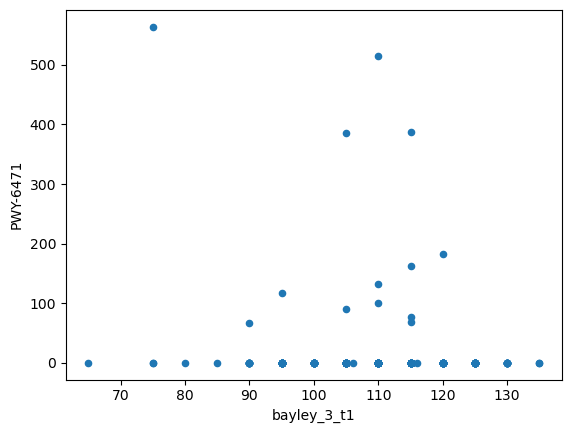

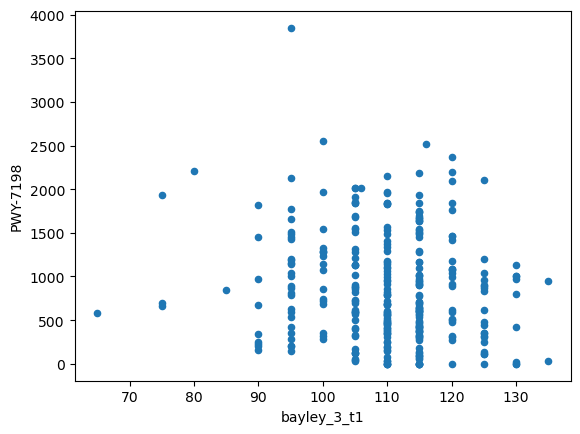

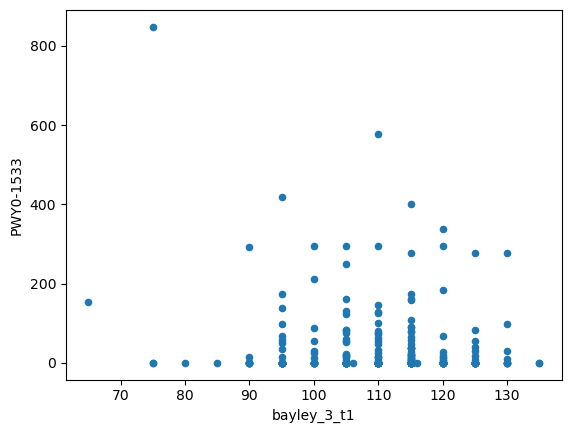

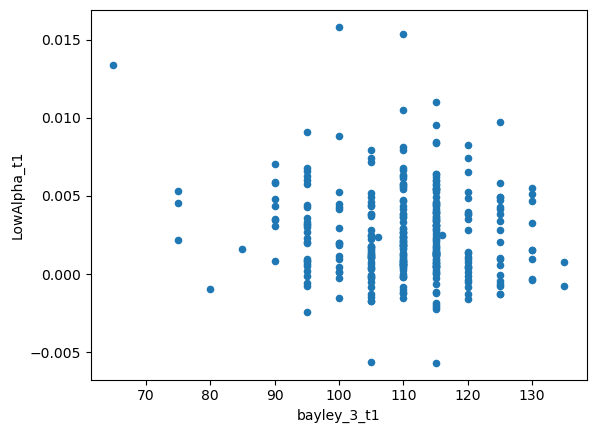

In [83]:

for i in range(5):
    df_correlations.plot.scatter(0,i+1)